### 1.Importing the libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 2. Importing the data

In [43]:
df=pd.read_csv("advertising.csv")

In [44]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [46]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values

### 3. Data Visualization

In [47]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

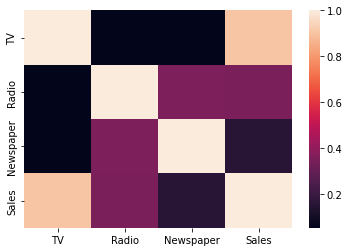

In [48]:
sns.heatmap(df.corr())

<Axes: >

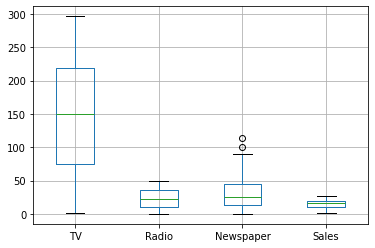

In [49]:
df.boxplot()

Only a few outliers spotted in Newspaper

### 4. Machine Learning

In [50]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
X=np.array(df.drop('Sales',axis=1))
Y=np.array(df.Sales).reshape(-1,1)

#### Splitting the data

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=42)

#### Choosing the model

In [53]:
model=LinearRegression()

#### Fitting the model

In [54]:
model.fit(X_train,Y_train)

LinearRegression()

### Prediction

In [55]:
Y_pred=model.predict(X_test)

In [56]:
Y_pred

array([[17.0347724 ],
       [20.40974033],
       [23.72398873],
       [ 9.27278518],
       [21.68271879],
       [12.56940161],
       [21.08119452],
       [ 8.69035045],
       [17.23701254],
       [16.66657475],
       [ 8.92396497],
       [ 8.4817344 ],
       [18.2075123 ],
       [ 8.06750728],
       [12.64550975],
       [14.93162809],
       [ 8.12814594],
       [17.89876565],
       [11.00880637],
       [20.47832788],
       [20.80631846],
       [12.59883297],
       [10.9051829 ],
       [22.38854775],
       [ 9.41796094],
       [ 7.92506736],
       [20.83908497],
       [13.81520938],
       [10.77080925],
       [ 7.92682509],
       [15.95947357],
       [10.63490851],
       [20.80292008],
       [10.43434164],
       [21.5784752 ],
       [21.18364487],
       [12.12821771],
       [22.80953262],
       [12.60992766],
       [ 6.46441252]])

### Performance Testing

In [68]:
print("Model score =\t",model.score(X_test,Y_test))
print("r2_score =\t",r2_score(Y_test,Y_pred))
print("mean_squared_error =\t",mean_squared_error(Y_test,Y_pred))
print("mean_absolute_error =\t",mean_absolute_error(Y_test,Y_pred))

Model score =	 0.9059011844150826
r2_score =	 0.9059011844150826
mean_squared_error =	 2.907756910271091
mean_absolute_error =	 1.2748262109549344


#### Scatter plot representing the relationship

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

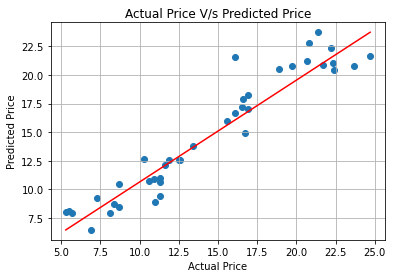

In [69]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(Y_test),max(Y_test)],[min(Y_pred),max(Y_pred)], color='red')
plt.title('Actual Price V/s Predicted Price')